# Summary


-----

# Imports

In [1]:
%run imports.ipynb

2016-08-15 13:29:14.972870


In [2]:
NOTEBOOK_NAME = 'interface_load_data'
os.makedirs(NOTEBOOK_NAME, exist_ok=True)

os.environ['NOTEBOOK_NAME'] = NOTEBOOK_NAME
os.environ['DB_PORT'] = '8309'

In [3]:
%run mysqld.ipynb

2016-08-15 13:29:15,316 - root - INFO - MySQL database already running...


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
2016-08-15 13:29:15.300451


In [4]:
db_remote = datapkg.MySQL(
    connection_string=os.environ['DATAPKG_CONNECTION_STR'] + '/elaspic', 
    shared_folder=os.environ['NOTEBOOK_NAME'], 
    storage_host=None, 
    echo=False, 
    db_engine='MyISAM')

# Load data

In [5]:
DATASETS = ['kortemme_baker', 'skempi', 'taipale_ppi', 'taipale_gpca']

INPUT_DF = []
for dataset in DATASETS:
    df = pd.read_sql_table(dataset, db_remote.engine, schema='protein_interaction_energy')
    df['dataset'] = dataset
    INPUT_DF.append(df)
INPUT_DF = pd.concat(INPUT_DF, ignore_index=True)

In [6]:
DATA = {}

## kortemme_baker

In [7]:
sql_query = """\
SELECT * 
FROM elaspic_training_set.kortemme_baker_elaspic_scores
WHERE (pdb_id, pdb_chain, pdb_mutation) not in (
    SELECT pdb_id, pdb_chain, pdb_mutation from elaspic_training_set.skempi_elaspic_scores);
"""
kmtools.jupyter_tools.print_sql(sql_query)

kortemme_baker_results = pd.read_sql_query(sql_query, db.engine)

In [8]:
display(kortemme_baker_results.head(2))
print(kortemme_baker_results.shape[0])

,_index,pdb_id,pdb_chain,partner_pdb_chain,pdb_mutation,mutation,mutation_modeller,idx,idxs,alignment_coverage,alignment_identity,alignment_score,analyse_complex_energy_mut,analyse_complex_energy_wt,chain_modeller,contact_distance_mut,contact_distance_wt,ddg,interface_area_hydrophilic,interface_area_hydrophobic,interface_area_total,matrix_score,model_file_mut,model_file_wt,mutation_errors,norm_dope,physchem_mut,physchem_mut_ownchain,physchem_wt,physchem_wt_ownchain,provean_score,secondary_structure_mut,secondary_structure_wt,solvent_accessibility_mut,solvent_accessibility_wt,stability_energy_mut,stability_energy_wt,ddg_exp
0,2,3hfm,Y,None,N93A,N93A,N307A,2,"[0, 2]",100.0,100.0,1.0,"43.8084,81.7971,5.04336,-1.06577,-1.71866,-4.8...","43.8147,81.7971,4.18029,-1.10015,-2.79955,-5.0...",Y,2.431894,2.431894,0.578378,168.485,67.335,235.82,-2,/home/kimlab1/database_data/biodb/recipes/prot...,/home/kimlab1/database_data/biodb/recipes/prot...,,-0.404127,"0,0,0,9","0,0,0,17","0,0,1,9","0,0,5,21",-1.010,H,H,50.884576,49.746769,"222.206,-171.387,-100.349,-375.476,-8.89289,51...","221.244,-172.095,-102.061,-376.182,-8.89289,51...",0.6
1,3,3hfm,L,None,Y50A,Y50A,Y50A,0,"[0, 2]",100.0,100.0,1.0,"81.7939,45.0529,2.99454,-0.969862,-3.70889,-4....","81.7647,45.0424,3.65549,-1.06189,-3.13034,-4.9...",L,6.150827,2.442211,-0.599876,168.485,67.335,235.82,-2,/home/kimlab1/database_data/biodb/recipes/prot...,/home/kimlab1/database_data/biodb/recipes/prot...,,-0.404127,"0,0,0,2","0,0,0,20","0,0,2,12","0,0,0,22",-0.044,T,T,14.823993,50.571489,"222.788,-171.878,-102.91,-374.3,-9.05566,515.3...","222.383,-171.985,-102.32,-376.183,-8.96791,516...",4.6


103


In [9]:
kortemme_baker_results['alignment_identity'] = kortemme_baker_results['alignment_identity'] / 100
kortemme_baker_results['alignment_coverage'] = kortemme_baker_results['alignment_coverage'] / 100
kortemme_baker_results['alignment_score'] = kortemme_baker_results['alignment_score'] / 100

In [10]:
_before = kortemme_baker_results.shape[0]
kortemme_baker_results = (
    kortemme_baker_results
    .merge(
        INPUT_DF[INPUT_DF['dataset'] == 'kortemme_baker'], 
        on=['pdb_id', 'pdb_chain', 'partner_pdb_chain', 'pdb_mutation', 'ddg_exp'])
)
_after = kortemme_baker_results.shape[0]
assert _before == _after, (_before, _after)

In [11]:
kortemme_baker_results = elaspic.elaspic_predictor.format_mutation_features(kortemme_baker_results)
kortemme_baker_results = elaspic.elaspic_predictor.convert_features_to_differences(kortemme_baker_results)

In [12]:
DATA['kortemme_baker'] = kortemme_baker_results.copy()

## skempi

In [13]:
sql_query = """\
SELECT *
FROM elaspic_training_set.skempi_elaspic_scores
"""
kmtools.jupyter_tools.print_sql(sql_query)

skempi_standalone_results = pd.read_sql_query(sql_query, db.engine)

In [14]:
display(skempi_standalone_results.head(2))
print(skempi_standalone_results.shape[0])

,_index,pdb_id,pdb_chain,partner_pdb_chain,pdb_mutation,mutation,mutation_modeller,idx,idxs,alignment_coverage,alignment_identity,alignment_score,analyse_complex_energy_mut,analyse_complex_energy_wt,chain_modeller,contact_distance_mut,contact_distance_wt,ddg,interface_area_hydrophilic,interface_area_hydrophobic,interface_area_total,matrix_score,model_file_mut,model_file_wt,mutation_errors,norm_dope,physchem_mut,physchem_mut_ownchain,physchem_wt,physchem_wt_ownchain,provean_score,secondary_structure_mut,secondary_structure_wt,solvent_accessibility_mut,solvent_accessibility_wt,stability_energy_mut,stability_energy_wt,ddg_exp
0,1,1gc1,C,G,S42A,S42A,S339A,1,"[0, 1]",100.0,100.0,1.0,"41.9659,131.714,-6.54501,-4.0065,-7.56168,-18....","41.9676,131.714,-4.85885,-4.0074,-7.59593,-18....",C,2.93074,2.101380,-1.041795,256.830,430.72,687.56,1,/home/kimlab1/database_data/biodb/recipes/prot...,/home/kimlab1/database_data/biodb/recipes/prot...,,-0.199640,"0,0,0,20","0,0,0,14","0,0,4,20","0,0,1,14",-2.190,T,T,64.068365,61.981030,"245.555,-255.403,-135.516,-553.462,-18.2303,74...","246.905,-255.404,-136.813,-553.727,-18.2333,74...",0.000000
1,2,2j0t,D,A,T2A,T2A,T163A,3,"[0, 3]",100.0,100.0,1.0,"31.5418,34.1706,-5.647,-7.83505,-2.13059,-13.6...","31.5419,34.1706,-4.7865,-7.8758,-2.64543,-14.2...",D,2.88516,2.178801,2.761585,189.175,290.78,479.96,0,/home/kimlab1/database_data/biodb/recipes/prot...,/home/kimlab1/database_data/biodb/recipes/prot...,,-1.043686,"0,0,0,31","0,0,0,5","0,0,1,36","0,0,1,5",-1.344,E,E,99.383511,103.129533,"111.667,-155.965,-79.502,-323.272,-7.41946,448...","112.14,-156.006,-80.0168,-323.921,-7.41946,449...",4.387813


1415


In [15]:
skempi_standalone_results['alignment_identity'] = skempi_standalone_results['alignment_identity'] / 100
skempi_standalone_results['alignment_coverage'] = skempi_standalone_results['alignment_coverage'] / 100
skempi_standalone_results['alignment_score'] = skempi_standalone_results['alignment_score'] / 100

In [16]:
_before = skempi_standalone_results.shape[0]
skempi_standalone_results = (
    skempi_standalone_results
    .merge(
        INPUT_DF[INPUT_DF['dataset'] == 'skempi'], 
        on=['pdb_id', 'pdb_chain', 'partner_pdb_chain', 'pdb_mutation', 'ddg_exp'])
)
_after = skempi_standalone_results.shape[0]
assert _before == _after, (_before, _after)

In [17]:
skempi_standalone_results = elaspic.elaspic_predictor.format_mutation_features(skempi_standalone_results)
skempi_standalone_results = elaspic.elaspic_predictor.convert_features_to_differences(skempi_standalone_results)

In [18]:
DATA['skempi'] = skempi_standalone_results.copy()

## database

In [19]:
sql_query = """\
SELECT *
FROM elaspic_training_interface.uniprot_domain_pair
JOIN elaspic_training_interface.uniprot_domain_pair_template USING (uniprot_domain_pair_id)
JOIN elaspic_training_interface.uniprot_domain_pair_model USING (uniprot_domain_pair_id)
JOIN elaspic_training_interface.uniprot_domain_pair_mutation USING (uniprot_domain_pair_id)
"""
kmtools.jupyter_tools.print_sql(sql_query)

database_results = pd.read_sql_query(sql_query, db.engine)

In [20]:
display(database_results.head(2))
print(database_results.shape[0])

,uniprot_domain_pair_id,uniprot_domain_id_1,uniprot_domain_id_2,rigids,domain_contact_ids,path_to_data,uniprot_id_1,uniprot_id_2,max_seq_identity,uniprot_domain_pair_id_old,domain_contact_id,cath_id_1,cath_id_2,identical_1,conserved_1,coverage_1,score_1,identical_if_1,conserved_if_1,coverage_if_1,score_if_1,identical_2,conserved_2,coverage_2,score_2,identical_if_2,conserved_if_2,coverage_if_2,score_if_2,score_total,score_if_total,score_overall,t_date_modified,template_errors,model_errors,alignment_filename_1,alignment_filename_2,model_filename,chain_1,chain_2,norm_dope,interface_area_hydrophobic,interface_area_hydrophilic,interface_area_total,interface_dg,interacting_aa_1,interacting_aa_2,m_date_modified,model_domain_def_1,model_domain_def_2,uniprot_id,mutation,mutation_errors,model_filename_wt,model_filename_mut,chain_modeller,mutation_modeller,analyse_complex_energy_wt,stability_energy_wt,analyse_complex_energy_mut,stability_energy_mut,physchem_wt,physchem_wt_ownchain,physchem_mut,physchem_mut_ownchain,matrix_score,secondary_structure_wt,solvent_accessibility_wt,secondary_structure_mut,solvent_accessibility_mut,contact_distance_wt,contact_distance_mut,provean_score,ddg,mut_date_modified
0,1,51959162,70394142,None,None,training/A0N/A6/A0NA69/V-set.22-117/V-set.20-1...,A0NA69,P01820,40,None,None,3eyfA00,3eyfB02,32.99,None,93.2039,0.338708,None,None,None,None,48.45,None,100.0,0.510275,None,None,None,None,None,None,None,None,None,None,A0NA69.20:122-3EYFABA.aln,P01820.20:115-3EYFABB.aln,A0NA69.20.122_P01820.20.115-3EYFAB.pdb,A,B,0.266669,NaN,NaN,NaN,None,"52,56,58,60,62,114,118,119,120,121,122","51,54,56,58,62,63,64,65,66,78,79,111,113,115",2016-08-11 20:40:33,20:122,20:115,P01820,Y51A,None,P01820_Y51A/P01820.20:115-A0NA69.20:122-Y32A-w...,P01820_Y51A/P01820.20:115-A0NA69.20:122-Y32A-m...,B,Y135A,"44.9808,84.325,-0.87828,-0.00285183,-0.0544136...","263.271,-81.1267,-54.6851,-211.684,-9.89911,31...","44.8776,84.325,-0.87828,-0.00285183,-0.0544136...","263.962,-81.1267,-54.6851,-210.917,-9.94076,31...","0,0,0,0","0,0,0,18","0,0,0,0","0,0,0,8",-2.0,C,68.5697,C,49.9279,10.34880,11.37000,-6.964,0.403210,2016-08-12 08:22:46
1,6,51959162,70394142,None,None,training/A0N/A6/A0NA69/V-set.22-117/V-set.20-1...,A0NA69,P01820,40,None,None,1adqL02,1adqH02,30.11,None,90.2913,0.303419,None,None,None,None,52.58,None,100.0,0.549510,None,None,None,None,None,None,None,None,None,None,A0NA69.20:122-1ADQLHL.aln,P01820.20:115-1ADQLHH.aln,A0NA69.20.122_P01820.20.115-1ADQLH.pdb,L,H,0.190215,NaN,NaN,NaN,None,"23,27,56,58,61,62,63,64,114,122","56,58,62,63,64,77,111,113",2016-08-11 23:58:46,20:122,20:115,P01820,D77A,None,P01820_D77A/P01820.20:115-A0NA69.20:122-D58A-w...,P01820_D77A/P01820.20:115-A0NA69.20:122-D58A-m...,H,D161A,"39.3054,85.9075,-1.16092,-4.26326e-14,-2.38255...","237.187,-78.1859,-40.4395,-195.733,-6.01677,27...","39.2894,85.9075,-1.24704,-3.55271e-14,-2.38255...","236.758,-78.1767,-40.4395,-195.596,-6.07785,27...","0,0,0,0","0,0,0,15","0,0,0,0","0,0,0,13",-2.0,B,56.1353,B,43.6560,5.85008,7.19998,-2.820,0.289617,2016-08-12 08:06:58


9737


In [21]:
database_results['alignment_identity'] = (
    database_results['identical_1'] + database_results['identical_2']) / 2 / 100.0
database_results['alignment_coverage'] = (
    database_results['coverage_1'] + database_results['coverage_2']) / 2 / 100.0
database_results['alignment_score'] = (
    database_results['score_1'] + database_results['score_2']) / 2

In [22]:
database_results.sort_values('alignment_score', ascending=False)['alignment_score'].head()

9535    0.992235
9536    0.992235
9534    0.992235
9533    0.992235
9532    0.992235
Name: alignment_score, dtype: float64

In [23]:
database_results = (
    database_results
    .sort_values('alignment_score', ascending=False)
    .drop_duplicates(['uniprot_id_1', 'uniprot_id_2', 'max_seq_identity', 'uniprot_id', 'mutation'])
)

In [24]:
display(database_results.head(2))
print(database_results.shape[0])

,uniprot_domain_pair_id,uniprot_domain_id_1,uniprot_domain_id_2,rigids,domain_contact_ids,path_to_data,uniprot_id_1,uniprot_id_2,max_seq_identity,uniprot_domain_pair_id_old,domain_contact_id,cath_id_1,cath_id_2,identical_1,conserved_1,coverage_1,score_1,identical_if_1,conserved_if_1,coverage_if_1,score_if_1,identical_2,conserved_2,coverage_2,score_2,identical_if_2,conserved_if_2,coverage_if_2,score_if_2,score_total,score_if_total,score_overall,t_date_modified,template_errors,model_errors,alignment_filename_1,alignment_filename_2,model_filename,chain_1,chain_2,norm_dope,interface_area_hydrophobic,interface_area_hydrophilic,interface_area_total,interface_dg,interacting_aa_1,interacting_aa_2,m_date_modified,model_domain_def_1,model_domain_def_2,uniprot_id,mutation,mutation_errors,model_filename_wt,model_filename_mut,chain_modeller,mutation_modeller,analyse_complex_energy_wt,stability_energy_wt,analyse_complex_energy_mut,stability_energy_mut,physchem_wt,physchem_wt_ownchain,physchem_mut,physchem_mut_ownchain,matrix_score,secondary_structure_wt,solvent_accessibility_wt,secondary_structure_mut,solvent_accessibility_mut,contact_distance_wt,contact_distance_mut,provean_score,ddg,mut_date_modified,alignment_identity,alignment_coverage,alignment_score
9535,2415,27096293,78400951,None,None,training/Q7A/26/Q7A260/NuiA.2-135/Endonuclease...,P38446,Q7A260,100,None,None,2o3bB00,2o3bA00,100.0,None,99.2593,0.992593,None,None,None,None,99.58,None,99.5851,0.991877,None,None,None,None,None,None,None,None,None,None,Q7A260.1:135-2O3BBAB.aln,P38446.34:274-2O3BBAA.aln,Q7A260.1.135_P38446.34.274-2O3BBA.pdb,B,A,-1.77102,289.27,1079.12,1368.39,None,"20,22,23,24,25,26,59,69,74,75,76,77,80,81,106,...","92,93,94,95,96,97,98,99,101,111,112,113,114,11...",2016-08-12 00:00:15,1:135,34:274,Q7A260,Q74A,None,Q7A260_Q74A/Q7A260.1:135-P38446.34:274-Q74A-wt...,Q7A260_Q74A/Q7A260.1:135-P38446.34:274-Q74A-mu...,B,Q74A,"26.3138,41.2859,-10.0987,-3.04658,-7.74443,-12...","42.1026,-226.468,-126.611,-448.685,-13.1404,62...","26.2272,41.2859,-10.221,-3.04658,-7.74443,-11....","42.2896,-225.876,-125.981,-447.8,-13.1404,623....","0,0,0,4","0,0,2,30","0,0,0,1","0,0,0,24",-1.0,T,46.0743,T,34.4626,4.81649,7.03566,-3.033,-0.011127,2016-08-13 01:18:57,0.9979,0.994222,0.992235
9536,2415,27096293,78400951,None,None,training/Q7A/26/Q7A260/NuiA.2-135/Endonuclease...,P38446,Q7A260,100,None,None,2o3bB00,2o3bA00,100.0,None,99.2593,0.992593,None,None,None,None,99.58,None,99.5851,0.991877,None,None,None,None,None,None,None,None,None,None,Q7A260.1:135-2O3BBAB.aln,P38446.34:274-2O3BBAA.aln,Q7A260.1.135_P38446.34.274-2O3BBA.pdb,B,A,-1.77102,289.27,1079.12,1368.39,None,"20,22,23,24,25,26,59,69,74,75,76,77,80,81,106,...","92,93,94,95,96,97,98,99,101,111,112,113,114,11...",2016-08-12 00:00:15,1:135,34:274,Q7A260,W76A,None,Q7A260_W76A/Q7A260.1:135-P38446.34:274-W76A-wt...,Q7A260_W76A/Q7A260.1:135-P38446.34:274-W76A-mu...,B,W76A,"26.3138,42.0833,-8.73721,-3.04247,-6.64259,-12...","43.5699,-226.735,-125.901,-448.668,-13.1403,62...","25.8709,41.9883,-5.66352,-3.04247,-6.64259,-10...","46.5229,-226.99,-126.156,-445.807,-13.1632,623...","0,0,0,23","0,0,0,21","0,0,0,7","0,0,0,11",-3.0,T,72.6457,T,83.9531,3.32451,3.92348,-13.467,1.837060,2016-08-13 01:19:07,0.9979,0.994222,0.992235


1888


In [25]:
def get_partner_uniprot_id(uniprot_id, uniprot_id_1, uniprot_id_2):
    if uniprot_id == uniprot_id_1:
        return uniprot_id_2
    return uniprot_id_1


database_results['partner_uniprot_id'] = [
    get_partner_uniprot_id(*x) 
    for x in database_results[['uniprot_id', 'uniprot_id_1', 'uniprot_id_2']].values
]


database_results = database_results.drop(pd.Index(['uniprot_id_1', 'uniprot_id_2']), axis=1)


database_results = (
    database_results.rename(columns={'mutation': 'uniprot_mutation'})
)

In [26]:
_before = database_results.shape[0]
database_results = (
    database_results
    .merge(INPUT_DF, on=['uniprot_id', 'partner_uniprot_id', 'uniprot_mutation'])
)
_after = database_results.shape[0]

print2("Rows before merging:", _before)
print2("Rows after merging:", _after)

Rows before merging:                                        1888
Rows after merging:                                         2067


In [27]:
database_results = elaspic.elaspic_predictor.format_mutation_features(database_results)
database_results = elaspic.elaspic_predictor.convert_features_to_differences(database_results)

In [28]:
DATA['skempi_database'] = database_results[database_results['dataset'] == 'skempi'].copy()
DATA['taipale_ppi_database'] = database_results[database_results['dataset'] == 'taipale_ppi'].copy()
DATA['taipale_gpca_database'] = database_results[database_results['dataset'] == 'taipale_gpca'].copy()

assert (
    DATA['skempi_database'].shape[0] + 
    DATA['taipale_ppi_database'].shape[0] + 
    DATA['taipale_gpca_database'].shape[0]) == database_results.shape[0]

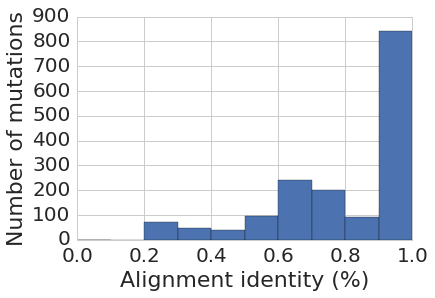

In [29]:
(DATA['skempi_database']['alignment_identity'] - 0.00001).hist(range=(0, 1), bins=10)
plt.xlabel("Alignment identity (%)")
plt.ylabel("Number of mutations")

## humsavar / clinvar / cosmic

### Load precalculated

In [30]:
with open(op.join(NOTEBOOK_NAME, 'DATA_elaspic.pkl'), 'rb') as ifh:
    DATA_elaspic = pickle.load(ifh)

In [31]:
DATA_elaspic.keys()

dict_keys(['clinvar', 'cosmic', 'humsavar'])

In [32]:
for key in DATA_elaspic:
    df = DATA_elaspic[key]
    df['alignment_identity'] = (df['identical_1'] + df['identical_2']) / 2
    df['alignment_coverage'] = (df['coverage_1'] + df['coverage_2']) / 2
    df['alignment_score'] = (df['score_1'] + df['score_2']) / 2

In [33]:
DATA.update(DATA_elaspic)

In [34]:
DATA.keys()

dict_keys(['taipale_ppi_database', 'skempi', 'clinvar', 'cosmic', 'skempi_database', 'kortemme_baker', 'taipale_gpca_database', 'humsavar'])

### Construct SQL query

### Run SQL query

## Save DATA

In [35]:
with open(op.join(NOTEBOOK_NAME, 'DATA.pkl'), 'wb') as ofh:
    pickle.dump(DATA, ofh, pickle.HIGHEST_PROTOCOL)

# DATA_DF

Combine data into a DataFrame.

All $\Delta \Delta G$ datasets go into a single "protherm" dataset.

In [36]:
# In case of duplicates, the dataset occuring FIRST has the priority
dataset_map = {
    # Best sequence identity
    ('kortemme_baker', 'skempi'),
    ('skempi', 'skempi'),
    ('skempi_database', 'skempi'),
    #
    ('taipale_ppi_database', 'taipale_ppi'),
    ('taipale_gpca_database', 'taipale_gpca'),
    #
    ('humsavar', 'humsavar'),
    ('clinvar', 'clinvar'),
    ('cosmic', 'cosmic'),
}


df_list = []
for dataset_extra, dataset in dataset_map:
    df = DATA[dataset_extra]
    df['dataset'] = dataset
    df_list.append(df)

DATA_DF = pd.concat(df_list, ignore_index=True)
assert DATA_DF.shape[0] == sum(df.shape[0] for df in DATA.values())

In [37]:
for c in ['ddg_exp', 'del_score_exp', 'del_class_exp']:
    DATA_DF[c] = DATA_DF[c].astype(float)

In [38]:
DATA_DF[(DATA_DF['alignment_identity'] > 100) | (DATA_DF['alignment_identity'] <= 1)].shape

(148307, 165)

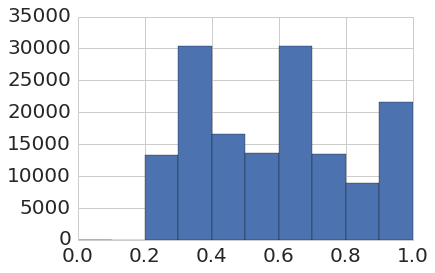

In [39]:
DATA_DF['alignment_identity'].hist(range=(0, 1))

In [40]:
assert (DATA_DF['alignment_identity'] > 0.1).all()

In [41]:
# Set 'max_seq_identity' where it is missing
DATA_DF.loc[DATA_DF['max_seq_identity'].isnull(), 'max_seq_identity'] = (
    DATA_DF[DATA_DF['max_seq_identity'].isnull()]
    ['alignment_identity']
    .apply(local.get_max_seq_identity)
)

In [42]:
display(DATA_DF.head())
print(DATA_DF.shape)

,_index,alignment_coverage,alignment_filename_1,alignment_filename_2,alignment_identity,alignment_score,backbone_clash_change,backbone_clash_wt,backbone_hbond_change,backbone_hbond_wt,cath_id_1,cath_id_2,chain_1,chain_2,chain_modeller,cis_bond_change,cis_bond_wt,conserved_1,conserved_2,conserved_if_1,conserved_if_2,contact_distance_change,contact_distance_wt,coverage_1,coverage_2,coverage_if_1,coverage_if_2,dataset,db,ddg,ddg_exp,del_class_exp,del_score_exp,dg_change,dg_wt,disulfide_change,disulfide_wt,domain_contact_id,domain_contact_ids,electrostatic_kon_change,electrostatic_kon_wt,electrostatics_change,electrostatics_wt,energy_ionisation_change,energy_ionisation_wt,entropy_complex_change,entropy_complex_wt,entropy_mainchain_change,entropy_mainchain_wt,entropy_sidechain_change,entropy_sidechain_wt,gene_name,helix_dipole_change,helix_dipole_wt,id,identical_1,identical_2,identical_if_1,identical_if_2,idx,idx_x,idx_y,idxs,interacting_aa_1,interacting_aa_2,interface_area_hydrophilic,interface_area_hydrophobic,interface_area_total,interface_dg,intraclashes_energy_1_change,intraclashes_energy_1_wt,intraclashes_energy_2_change,intraclashes_energy_2_wt,m_date_modified,matrix_score,max_seq_identity,mloop_entropy_change,mloop_entropy_wt,model_domain_def_1,model_domain_def_2,model_errors,model_file_mut,model_file_wt,model_filename,model_filename_mut,model_filename_wt,mut_date_modified,mutation,mutation_errors,mutation_modeller,norm_dope,number_of_residues,organism_name,partial_covalent_bonds_change,partial_covalent_bonds_wt,partner_pdb_chain,partner_uniprot_id,path_to_data,pcv_hbond_change,pcv_hbond_self_change,pcv_hbond_self_wt,pcv_hbond_wt,pcv_salt_equal_change,pcv_salt_equal_self_change,pcv_salt_equal_self_wt,pcv_salt_equal_wt,pcv_salt_opposite_change,pcv_salt_opposite_self_change,pcv_salt_opposite_self_wt,pcv_salt_opposite_wt,pcv_vdw_change,pcv_vdw_self_change,pcv_vdw_self_wt,pcv_vdw_wt,pdb_chain,pdb_id,pdb_mutation,pfam_clan,pfam_id,protein_existence,protein_name,provean_score,rigids,score_1,score_2,score_if_1,score_if_2,score_if_total,score_overall,score_total,secondary_structure_change,secondary_structure_wt,sequence_version,sidechain_hbond_change,sidechain_hbond_wt,sloop_entropy_change,sloop_entropy_wt,solvation_hydrophobic_change,solvation_hydrophobic_wt,solvation_polar_change,solvation_polar_wt,solvent_accessibility_change,solvent_accessibility_wt,stability_energy_mut,stability_energy_wt,t_date_modified,template_errors,torsional_clash_change,torsional_clash_wt,uniprot_domain_id_1,uniprot_domain_id_2,uniprot_domain_pair_id,uniprot_domain_pair_id_old,uniprot_id,uniprot_id_1,uniprot_id_2,uniprot_mutation,uniprot_name,uniprot_sequence,van_der_waals_change,van_der_waals_clashes_change,van_der_waals_clashes_wt,van_der_waals_wt,water_bridge_change,water_bridge_wt
0,NaN,0.990566,P60891.1:318-4F8EBAB.aln,P60891.1:318-4F8EBAA.aln,0.9746,0.966664,0.00000,8.82402,0.00000,-4.52594,4f8eB00,4f8eA00,B,A,B,0.0,0.0,None,None,None,None,0.58585,5.28103,99.0566,99.0566,None,None,taipale_ppi,NaN,2.006510,0.0,NaN,NaN,-0.10918,-3.56011,0.0,0.0,None,None,0.00000,-0.824706,0.00000,-2.243250,0.00000,4.117350e-01,0.0,2.384,-0.03732,5.03275,-0.0312,16.6048,NaN,0.000000,0.413702,NaN,97.46,97.46,None,None,1888.0,NaN,NaN,NaN,"98,99,100,101,102,104,107,110,114,131,132,133,...","98,99,100,101,102,104,107,110,114,131,132,133,...",1329.31,646.910,1976.21,None,0.0266,77.8373,0.0,98.4712,2016-08-11 23:54:23,0.0,100.0,0.0,0.0,3:317,2:316,None,NaN,NaN,P60891.1.318_P60891.1.318-4F8EBA.pdb,P60891_N114S/P60891.3:317-P60891.2:316-N112S-m...,P60891_N114S/P60891.3:317-P60891.2:316-N112S-w...,2016-08-13 04:35:20,NaN,None,N112S,-1.452380,632.0,NaN,0.0,2.220450e-16,NaN,P60891,training/P60/89/P60891/Pribosyltran_N+Pribosyl...,0,3,0,0,0,0,0,0,0,0,0,0,0,-1,22,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-4.378,None,0.966664,0.966664,None,None,None,None,None,0,4,NaN,0.0000,-13.68950,0.0,0.0,0.0195,-34.4175,-0.0920,42.3247,-17.3762,52.5761,"131.682,-443.232,-166.854,-758.641,-22.9629,10...","1

(148307, 165)


In [43]:
pprint(set(DATA_DF['dataset']))

{'taipale_ppi', 'skempi', 'clinvar', 'taipale_gpca', 'cosmic', 'humsavar'}


## Add a train / test split

In [44]:
TRAINING_DATASETS = [
    'skempi',
    'taipale_ppi',
    'taipale_gpca',
]

VALIDATION_DATASETS = [
    'humsavar',
    'clinvar',
    'cosmic',    
]

In [45]:
# Add a '_train' and '_test' columns
import math

# Not enough training data to have a test set for these...
_df1 = DATA_DF[(DATA_DF['dataset'] == 'taipale_ppi')].copy()
_df1['dataset'] = 'taipale_ppi_train'
_df2 = DATA_DF[(DATA_DF['dataset'] == 'taipale_gpca')].copy()
_df2['dataset'] = 'taipale_gpca_train'
ls_all = [_df1, _df2]

DIVIDER = 2.5

for dataset in VALIDATION_DATASETS:
    ls_train = []
    ls_test = []

    df = DATA_DF[(DATA_DF['dataset'] == dataset)]

    if df['ddg_exp'].notnull().all():
        df = df.sort_values('ddg_exp')
        df1 = df[:df.shape[0] // 2]
        df2 = df[df.shape[0] // 2:]
        assert df.shape[0] == (df1.shape[0] + df2.shape[0])
    elif df['del_class_exp'].notnull().all():
        df1 = df[df['del_class_exp'] == 0]
        df2 = df[df['del_class_exp'] != 0]
        assert df.shape[0] == (df1.shape[0] + df2.shape[0])
    else:
        raise Exception

    df_train = pd.concat([
            df1[:-math.floor(df1.shape[0] // DIVIDER)], 
            df2[:-math.floor(df2.shape[0] // DIVIDER)]], 
        ignore_index=True)
    df_test = pd.concat([
            df1[-math.floor(df1.shape[0] // DIVIDER):], 
            df2[-math.floor(df2.shape[0] // DIVIDER):]], 
        ignore_index=True)

    df_train['dataset'] = dataset + '_train'
    df_test['dataset'] = dataset + '_test'

    assert DATA_DF[(DATA_DF['dataset'] == dataset)].shape[0] == (df_train.shape[0] + df_test.shape[0])

    ls_all.extend([df_train, df_test])

df_all = pd.concat(ls_all, ignore_index=True)

In [46]:
# Print stats
display(df_all['dataset'].drop_duplicates().values.tolist())

for dataset in ['taipale_ppi', 'taipale_gpca'] + VALIDATION_DATASETS:
    n_train = df_all[df_all['dataset'] == dataset + '_train'].shape[0]
    n_test = df_all[df_all['dataset'] == dataset + '_test'].shape[0]
    print('{:20s} {:10d} {:10d} {:10.4f}'.format(dataset, n_train, n_test, n_test / (n_train + n_test)))

['taipale_ppi_train',
 'taipale_gpca_train',
 'humsavar_train',
 'humsavar_test',
 'clinvar_train',
 'clinvar_test',
 'cosmic_train',
 'cosmic_test']

taipale_ppi                 267          0     0.0000
taipale_gpca                179          0     0.0000
humsavar                   8798       5864     0.3999
clinvar                   12601       8399     0.4000
cosmic                    65437      43623     0.4000


In [47]:
# Make sure that '_train' in one does not appear in '_test' in other
train_uniprots = {
    x 
    for dataset in TRAINING_DATASETS
    for x in DATA_DF[(DATA_DF['dataset'] == dataset)]['uniprot_id'].values
}

for dataset in VALIDATION_DATASETS:
    
    train_uniprots |= set(df_all[df_all['dataset'] == dataset + '_train']['uniprot_id'])

    df_all.loc[
        (df_all['dataset'] == dataset + '_test') & df_all['uniprot_id'].isin(train_uniprots),
        'dataset'
    ] = dataset + '_train'

In [48]:
# Print stats
display(df_all['dataset'].drop_duplicates())

for dataset in ['taipale_ppi', 'taipale_gpca'] + VALIDATION_DATASETS:
    n_train = df_all[df_all['dataset'] == dataset + '_train'].shape[0]
    n_test = df_all[df_all['dataset'] == dataset + '_test'].shape[0]
    print('{:20s} {:10d} {:10d} {:10.4f}'.format(dataset, n_train, n_test, n_test / (n_train + n_test)))

0          taipale_ppi_train
267       taipale_gpca_train
446           humsavar_train
9262           humsavar_test
15108          clinvar_train
27712           clinvar_test
36108           cosmic_train
101904           cosmic_test
Name: dataset, dtype: object

taipale_ppi                 267          0     0.0000
taipale_gpca                179          0     0.0000
humsavar                   9109       5553     0.3787
clinvar                   16371       4629     0.2204
cosmic                    82669      26391     0.2420


In [49]:
DATA_DF_TT = pd.concat([DATA_DF, df_all], ignore_index=True)
assert DATA_DF_TT.shape[0] == (DATA_DF.shape[0] + df_all.shape[0])

## Save

In [50]:
DATA_DF.to_pickle(op.join(NOTEBOOK_NAME, 'DATA_DF.pkl'))

In [51]:
DATA_DF_TT.to_pickle(op.join(NOTEBOOK_NAME, 'DATA_DF_TT.pkl'))

In [52]:
datetime.datetime.now()

datetime.datetime(2016, 8, 15, 13, 31, 56, 187741)